In [81]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sd1.jpeg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle<-45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 



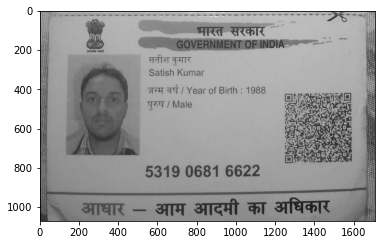

In [82]:
get_grayscale(img)
plt.imshow(get_grayscale(img),'gray')

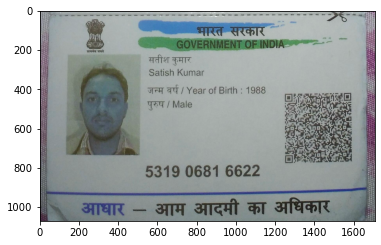

In [83]:
plt.imshow(img)

In [84]:
img=remove_noise(img)

In [85]:
#img=thresholding(img)

In [86]:
#img=dilate(img)

In [87]:
#img=erode(img)
#img=opening(img)
#img=canny(img)
#img=deskew(img)

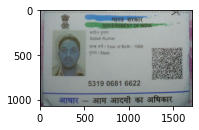

<Figure size 432x288 with 0 Axes>

In [88]:
import numpy as np
import cv2


#img = cv2.imread('.png')

#dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.figure(50)
#plt.subplot(122),plt.imshow(dst)
plt.show()

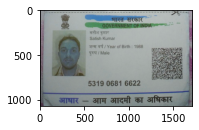

In [89]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("sd1.jpeg")

#dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
#plt.figure(100)
#plt.figimage(50)
plt.figaspect(100)
    #figsize=(31,40))

#plt.subplot(122),plt.imshow(dst)
plt.show()


import numpy as np
import cv2
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('vtest.avi')

# create a list of first 5 frames
img = [cap.read()[1] for i in xrange(5)]

# convert all to grayscale
gray = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in img]

# convert all to float64
gray = [np.float64(i) for i in gray]

# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10

# Add this noise to images
noisy = [i+noise for i in gray]

# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]

# Denoise 3rd frame considering all the 5 frames
dst = cv2.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)

plt.subplot(131),plt.imshow(gray[2],'gray')
plt.subplot(132),plt.imshow(noisy[2],'gray')
plt.subplot(133),plt.imshow(dst,'gray')
plt.show()

In [90]:
from PIL import Image
from PIL import ImageFilter

# Open an already existing image
imageObject = Image.open("sd1.jpeg");
imageObject.show();

# Apply sharp filter
sharpened1 = imageObject.filter(ImageFilter.SHARPEN);
sharpened2 = sharpened1.filter(ImageFilter.SHARPEN);

# Show the sharpened images
sharpened1.show();
sharpened2.show();

In [91]:
import cv2
 
img = cv2.imread('sd1.jpeg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
#cv2.imshow("Resized image", resized)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
 

Original Dimensions :  (1071, 1707, 3)
Resized Dimensions :  (535, 853, 3)


In [92]:
from PIL import Image

im = Image.open("sd1.jpeg")
im.save("sd1.jpeg", dpi=(600,600))

In [93]:
im1=cv2.imread("sd1.jpeg")

In [94]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("sd1.jpeg")

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
im_output.save('original-image.png')

factor = 0.5 #decrease constrast
im_out_l = enhancer.enhance(factor)
im_out_l.save('less-contrast-image.png')

factor = 1.7 #increase contrast
im_out_m= enhancer.enhance(factor)
im_out_m.save('more-contrast-image.png')

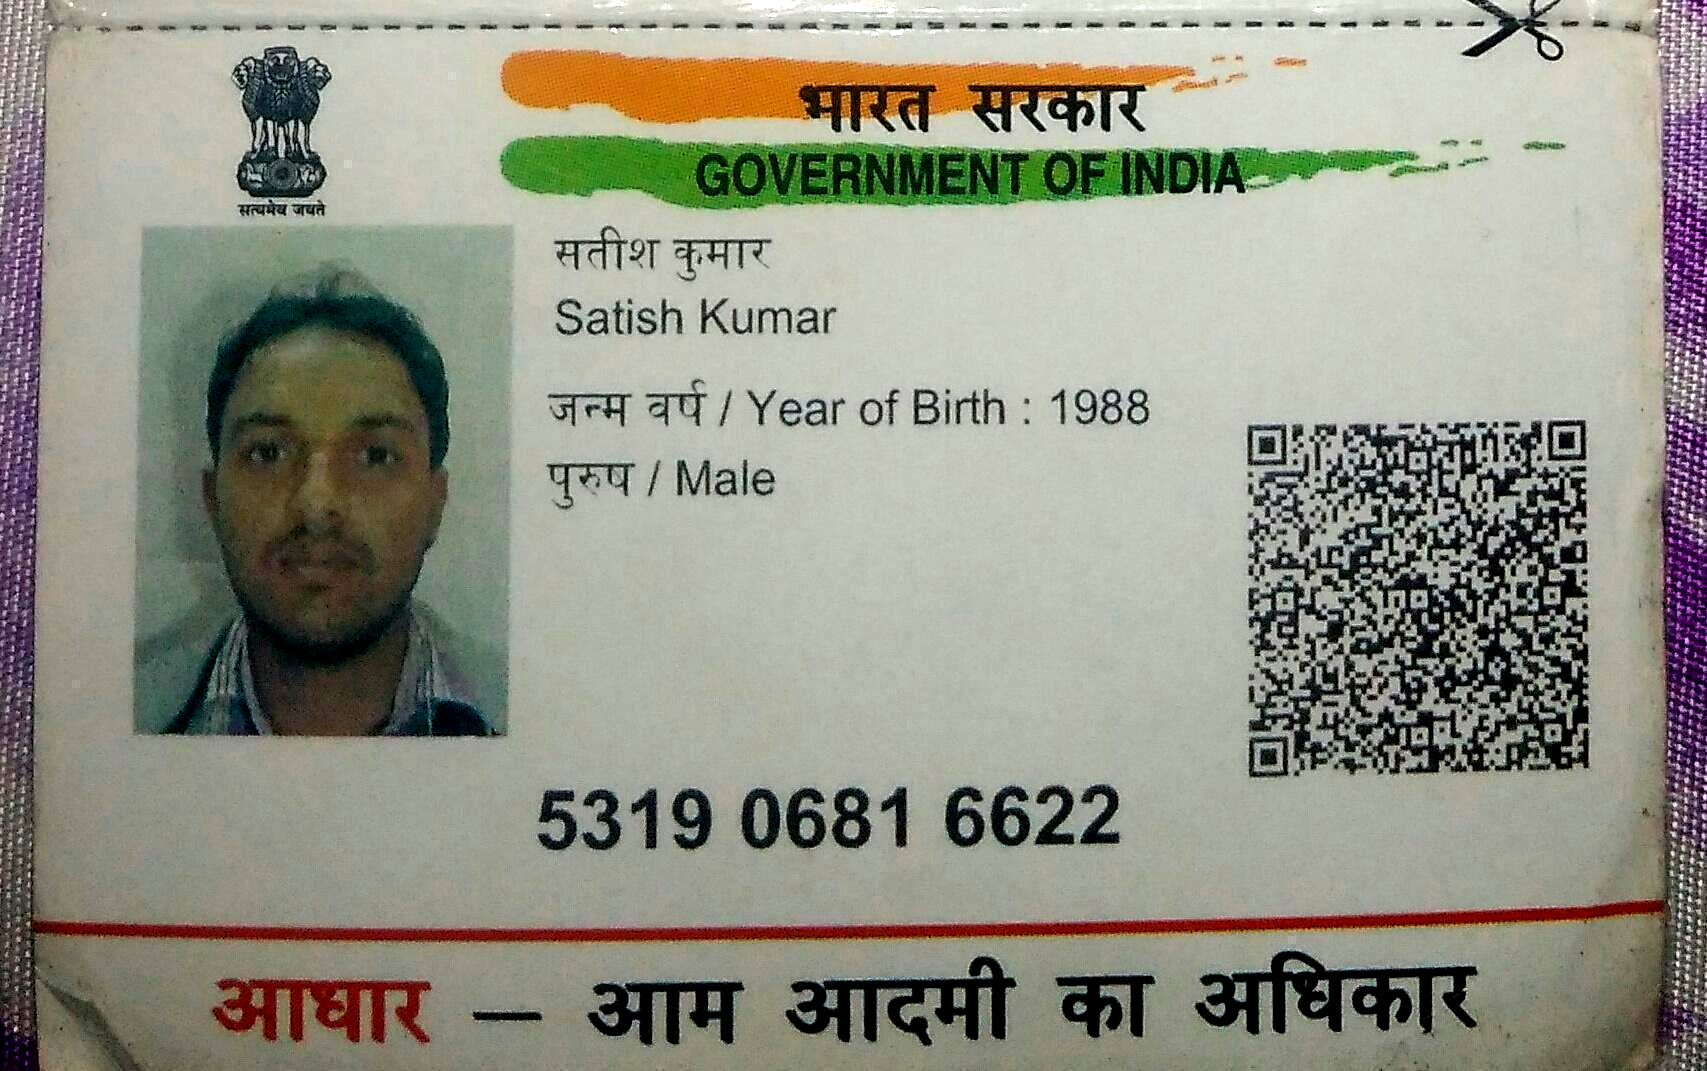

In [95]:
im_out_m

In [96]:
im = np.array(Image.open('more-contrast-image.png').convert('L').resize((256, 256)))
print(type(im))

<class 'numpy.ndarray'>


In [97]:
im

array([[144, 168, 146, ..., 116,  52,  86],
       [135, 146, 160, ..., 117, 125,  93],
       [140, 181, 143, ..., 112,  91, 155],
       ...,
       [  4,   5,   9, ...,  91,  97,  70],
       [  8,   7,   3, ...,  66,  68,  92],
       [  4,   6,   8, ..., 111,  75,  61]], dtype=uint8)

In [98]:
th = 128
im_bool = im > th
print(im_bool)

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [99]:
im_bin_128 = (im > th) * 255
print(im_bin_128)
# [[255 255 255 ..., 255 255   0]
#  [255 255 255 ..., 255 255   0]
#  [255 255 255 ..., 255   0   0]
#  ..., 
#  [  0   0   0 ...,   0   0   0]
#  [  0   0   0 ...,   0   0   0]
#  [  0   0   0 ...,   0   0   0]]

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [100]:
im_bin_64 = (im > 64) * 255
im_bin_192 = (im > 192) * 255

im_bin = np.concatenate((im_bin_64, im_bin_128, im_bin_192), axis=1)
Image.fromarray(np.uint8(im_bin)).save('binarize.png')

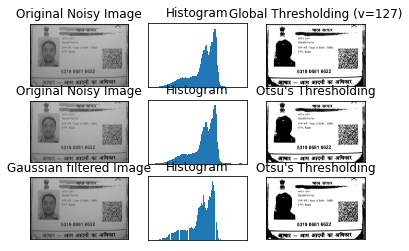

In [101]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sd1.jpeg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

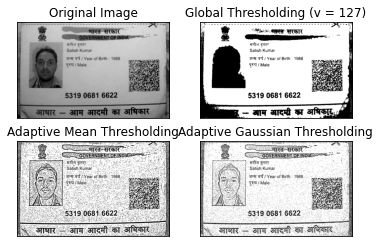

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [102]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('more-contrast-image.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
plt.figure(figsize=(30,30))

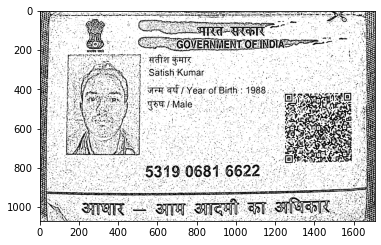

In [103]:
plt.imshow(th3,'gray')

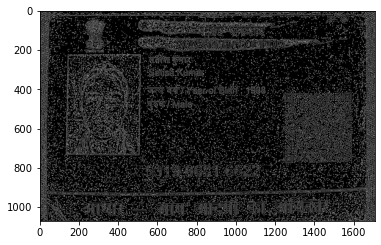

In [104]:
plt.imshow(cv2.Canny(th3, 100, 200),"gray")

In [105]:
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle<-45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

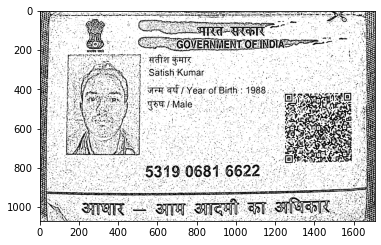

In [106]:
plt.imshow(deskew(th3),'gray')

In [107]:
img = cv2.imread('sd2.jpeg')

In [108]:
from PIL import Image, ImageEnhance
im2 = Image.open("sd2.jpeg")

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im2)

factor = 1 #gives original image
im_output2= enhancer.enhance(factor)
#im_output.save('original-image.png')

factor = 0.5 #decrease constrast
im_out_l2 = enhancer.enhance(factor)
#im_out_l.save('less-contrast-image.png')

factor = 1.7 #increase contrast
im_out_m2= enhancer.enhance(factor)
#im_out_m.save('more-contrast-image.png')

In [109]:
#deskew(img)

In [110]:
import numpy as np
import cv2
import math
from scipy import ndimage

img_before = cv2.imread('sd2.jpeg')

#cv2.imshow("Before", img_before)    
key = cv2.waitKey(0)

img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []

for x1, y1, x2, y2 in lines[0]:
    cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img_before, median_angle)

print ("Angle is {}".format(median_angle))
#cv2.imshow('rotated.jpg', img_rotated)  

Angle is -2.8341110163065135


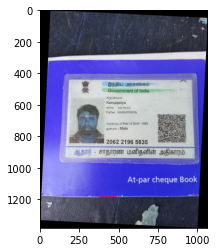

In [111]:
plt.imshow(img_rotated)

In [112]:
# import the necessary packages
from PIL import Image
import pytesseract
import argparse
import cv2
import os


In [113]:
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename,img_rotated )

True

In [125]:
#gray = cv2.threshold(img_rotated, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
gray = cv2.medianBlur(img, 3)

In [124]:
gray = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1529: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::threshold'
